<a href="https://colab.research.google.com/github/sadboiluytinh/CP/blob/main/ForecastingMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this notebook is to describe a few forecasting methods, starting from the simplest and moving on to the more sophisticated, neural network driven ideas.

You will find the following codes below:

i) Linear Regression

ii) Polynomial Regression

iii) Exponential model

iv) Triple exponential model

v) Tensorflow feed-forward neural network

vi) Long Short Term Memory neural network

----------------------------------------------

Examples and thorough documentation are provided for each code, and several exercises are included.

# Linear Regression

In this example, the linear_regression_forecast() function takes a list of numbers (numbers) and a positive integer (k) as input. It first creates the X and y arrays for linear regression, where X represents the indices of the numbers and y represents the numbers themselves.

The function then fits a linear regression model to the data using LinearRegression() from scikit-learn. Once the model is trained, it forecasts the next k values by generating a sequence of indices (forecast_indices) and predicting the corresponding values using the trained model.

Finally, the function returns the forecasts as a list. In the example usage, it prints the forecasted values for the given list numbers and k=3.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def linear_regression_forecast(numbers, k):
    """
    Perform linear regression on a list of numbers and forecast the next k values.

    Parameters:
    - numbers (list): A list of numeric values.
    - k (int): Number of values to forecast.

    Returns:
    - forecasts (list): A list of k forecasted values.

    """

    # Create X and y for linear regression
    X = np.arange(len(numbers)).reshape(-1, 1)
    y = np.array(numbers)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Forecast next k values
    last_index = len(numbers) - 1
    forecast_indices = np.arange(last_index + 1, last_index + k + 1).reshape(-1, 1)
    forecasts = model.predict(forecast_indices)

    return forecasts.tolist()


In [ ]:
# Example:

# Example usage
numbers = [2,3,5,9,11,16,20,23,29,33]
k = 3

forecasts = linear_regression_forecast(numbers, k)
print("Forecasted values:", forecasts)


Forecasted values: [34.73333333333333, 38.3030303030303, 41.87272727272727]


# Exercise 1:

Test the code above on a data set that is not very linear and convince yourself that linear regression, while a powerful took, has serious limitations.

# Exercise 2:

Read up on the mathematics of linear regression and discuss it with your group.

Linear Regression: $Y = b_0+b_1X+\epsilon$ with $Y$ is the output value, $b_0$ is the constant value, $b_1$ is the angle and $\epsilon$ is the error.

Use the square loss function $l(h,(x,y)) = (h(x)-y)^2 \implies L_S(h) = \frac{1}{n} \sum_{i=1}^m(h(x_i)-y_i)^2$. Minimize so take the gradient to be $0$

We see that if $w_0,w_1$ is the solution satisfying $\hat{Y} = w_0X+w_1$ such that $L(w) = \frac{1}{n} \sum_{i=1}^n (w_0x_i+w_1)^2$ is minimal

Taking the derivative wrt $w_0,w_1$ and we will find such line

We can also do gradient descent on learning rate $L$, with
$m = m-LD_m,c = c-LD_c$

Repeating again and again




# Polynomial regression

In this code, the polynomial_regression_forecast() function is described along with its parameters, return value, and an example usage. The parameters are explained, indicating that numbers should be a list of numeric values, k should be the number of values to forecast, and n should be the maximum degree of the polynomial.

The return value is described as a list of forecasted values. The example usage demonstrates how to use the function, showing the expected input and the resulting forecasted values.

The function uses the PolynomialFeatures class from scikit-learn to transform the input features X into polynomial features of degree n. It then fits a linear regression model using LinearRegression() from scikit-learn.

The documentation is formatted using the docstring conventions in Python, making it easily readable and accessible for users who want to understand and utilize the function.

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regression_forecast(numbers, k, n):
    """
    Perform polynomial regression on a list of numbers and forecast the next k values using polynomials of degree at most n.

    Parameters:
    - numbers (list): A list of numeric values.
    - k (int): Number of values to forecast.
    - n (int): Maximum degree of the polynomial.

    Returns:
    - forecasts (list): A list of k forecasted values.


    """

    # Create X and y for polynomial regression
    X = np.arange(len(numbers)).reshape(-1, 1)
    y = np.array(numbers)

    # Transform X to include polynomial features
    polynomial_features = PolynomialFeatures(degree=n)
    X_poly = polynomial_features.fit_transform(X)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Forecast next k values
    last_index = len(numbers) - 1
    forecast_indices = np.arange(last_index + 1, last_index + k + 1).reshape(-1, 1)
    forecast_indices_poly = polynomial_features.transform(forecast_indices)
    forecasts = model.predict(forecast_indices_poly)

    return forecasts.tolist()


In [ ]:
# Example:

numbers = [5,4,1548,1484,84919,15848,1514841115,5445454,54545451516,15155646,159484,15799,0,-1,48,849565]
k = 9
n = 15
forecasts = polynomial_regression_forecast(numbers, k, n)
print("Forecasted values:", forecasts)

Forecasted values: [16917554012034.125, 212858807385986.12, 1477960510365570.0, 7458506921697154.0, 3.049242597611098e+16, 1.0694561994403827e+17, 3.3323601091044134e+17, 9.44261938919727e+17, 2.473830824639947e+18]


# Exercise 3:

Test the code above with $N=2$ on cubic data, linear data, etc, and get a good feel for the limitations of the method. Try to be as systematic as you can given the time limitations.

# Exercise 4:

Read up on the mathematics of polynomial regression and discuss it with your group.

Polynomial regression: Similarly, using Least square algorithm

Limitations: There might be "outstanding" data that makes the algorithm does not work

Suppose we work on
$$Y = c_0+c_1X+c_2X^2+\cdots+c_nX^n+\varepsilon$$
Then, we see that if we can work on $\hat{Y} = w_0+w_1X+w_2X^2+\cdots+w_nX^n$, then we neet to minimize $|\hat{Y}-Y|$ by working on gradient


# The exponential model:

In this example, the exponential_forecast() function takes a list of real numbers (numbers) and a positive integer (k) as input. It computes the exponential growth rate by dividing the last number by the second-to-last number in the list.

Using the growth rate, it then forecasts the next k values by multiplying the last value in the list by successive powers of the growth rate.

Finally, the function returns the forecasts as a list. In the example usage, it prints the forecasted values for the given list numbers and k=3 using the exponential model.

In [ ]:
import numpy as np

def exponential_forecast(numbers, k):
    """
    Perform exponential forecasting on a list of real numbers and forecast the next k values using the exponential model.

    Parameters:
    - numbers (list): A list of real numbers.
    - k (int): Number of values to forecast.

    Returns:
    - forecasts (list): A list of k forecasted values.

    Example Usage:
    >>> numbers = [1, 2, 4, 8, 16]
    >>> k = 3
    >>> forecasts = exponential_forecast(numbers, k)
    >>> print("Forecasted values:", forecasts)
    Forecasted values: [32.0, 64.0, 128.0]
    """
    X = np.arange(len(numbers)).reshape(-1, 1)
    y = np.array(numbers)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, np.log(y))
    last_index = len(numbers) - 1
    forecast_indices = np.arange(last_index + 1, last_index + k + 1).reshape(-1, 1)
    forecasts = np.exp(model.predict(forecast_indices))

    return forecasts

In [ ]:
# Example

numbers = [1,1,1,1,1,1,2]
k = 3

forecasts = exponential_forecast(numbers, k)
print("Forecasted values:", forecasts)


Forecasted values: [1.48599429 1.60055409 1.72394564]


# Exercise 5:

This time things need to be done in a slightly reverse order. Read up on how the exponential model works and discuss it with the other participants.

# Exercise 6:

Find data sets that the exponential model gives fairly accurate predictions for. By the way, what constitutes an accurate prediction? Read up on some error measurement methods. Also find some data sets that the exponential model is not particularly accurate on.

# The triple exponential model

In this function, we use the ExponentialSmoothing class from the statsmodels.tsa.holtwinters module to perform the triple exponential smoothing. The trend parameter is set to "add" to capture any additive trend, and the seasonal parameter is set to "add" with seasonal_periods set to 4 to capture any additive seasonal patterns.

To use this function, you can pass your time series data as a list of numbers and the desired number of forecasted values k. The function will return a list of the forecasted values for the next k periods.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def triple_exponential_forecast(data, k):
    """
    Generates forecasts for the next k values using triple exponential smoothing.

    Args:
    - data: A list of numbers representing the time series data.
    - k: A positive integer indicating the number of values to forecast.

    Returns:
    - A list of forecasted values for the next k periods.
    """
    model = ExponentialSmoothing(data, trend="add", seasonal="add", seasonal_periods=5)
    model_fit = model.fit()
    forecast = model_fit.forecast(k)

    return forecast.tolist()


In [ ]:
# Example

data = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
k = 4

forecasts = triple_exponential_forecast(data, k)
print(f"Forecasted values: {forecasts}")


Forecasted values: [29.999989077576053, 31.999978634592086, 33.999979284191284, 35.99997096704859]


# Exercise 7:

Read up on how the triple exponential model works and discuss it with the other participants.

# Exercise 8:

Find data sets that the triple exponential model gives fairly accurate predictions for. Also find some data sets that the triple exponential model is not particularly accurate on.

# Neural Networks

We are now going to play with some neural networks. Here are som easily available packages:

PyTorch: PyTorch is a widely used open-source deep learning framework developed by Facebook's AI Research Lab. It provides dynamic computation graphs and offers a flexible and intuitive interface, making it popular among researchers and practitioners.

Keras: Keras is a high-level neural networks API written in Python. It acts as a user-friendly interface for various deep learning frameworks, including TensorFlow, Theano, and Microsoft Cognitive Toolkit (CNTK). Keras offers a simplified API for building neural networks, making it accessible for beginners.

Caffe: Caffe is a deep learning framework developed by Berkeley AI Research (BAIR). It focuses on speed and efficiency, particularly for computer vision tasks. Caffe has a C++ interface but also provides Python and MATLAB bindings.

MXNet: MXNet is an open-source deep learning framework developed by Apache. It is designed for efficiency and scalability, offering both imperative and symbolic programming interfaces. MXNet supports multiple programming languages, including Python, R, Scala, and Julia.

Torch: Torch is a scientific computing framework that provides efficient support for deep learning algorithms. It offers a dynamic and efficient scripting language called Lua, which is widely used for deep learning research. Torch is popular for its simplicity and flexibility.

Chainer: Chainer is a Python-based deep learning framework that provides a flexible and intuitive approach to building neural networks. It supports dynamic computation graphs and emphasizes on a "define-by-run" style of neural network construction.

CNTK (Microsoft Cognitive Toolkit): CNTK is a deep learning framework developed by Microsoft. It offers a highly efficient library for building neural networks with support for both symbolic and imperative programming paradigms. CNTK is known for its scalability and speed.

These frameworks provide a range of options with varying features and programming paradigms, allowing users to choose the one that aligns with their specific requirements and preferences.

# Feed-Forward Neural Network

The function forecast_next_values takes in two parameters: numbers (the time series data) and k (the number of previous values to use for forecasting).

The input data is prepared by creating input-output pairs for the feedforward network. X contains sequences of length k as input, and y contains the corresponding next value as the output.

The data is converted to numpy arrays to be compatible with the TensorFlow model.

A feedforward neural network model is created using the Sequential API from Keras. It consists of a dense layer with 10 units and ReLU activation as the input layer, followed by a dense layer with 1 unit as the output layer.

The model is compiled with the mean squared error loss function and the Adam optimizer.

The model is trained on the input-output pairs (X and y) for a specified number of epochs, with a batch size of 1.

To generate forecasts for the next k values, the function uses the trained model. It starts with the last k values from the input data and iteratively predicts the next value using the model. The predicted value is appended to the forecasted values, and the input data is updated by shifting it one step forward and replacing the last value with the predicted value.

The function returns the forecasted values for the next k periods.

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def forecast_next_values(numbers, k):
    """
    This function trains a feedforward neural network on a sequence of numbers to forecast the next 'k' values in the series.

    Args:
    numbers (list): List of numbers forming a time series.
    k (int): The number of future values to predict.

    Returns:
    forecasted_values (list): The forecasted future 'k' values.
    """

    # Set the random seeds for reproducibility
    np.random.seed(0)
    tf.random.set_seed(0)

    # Prepare the data for the feedforward network input
    X, y = [], []
    for i in range(len(numbers) - k):
        X.append(numbers[i:i+k])
        y.append(numbers[i+k])
    # Convert the data to numpy arrays
    X = np.array(X)
    y = np.array(y)
    print(X)
    print(y)
    # Create the feedforward model
    model = Sequential()
    model.add(Dense(10, input_dim=k, activation='relu'))  # Hidden layer with 10 neurons and ReLU activation
    model.add(Dense(1))  # Output layer

    # Compile the model with MSE as the loss function and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X, y, epochs=100, batch_size=1, verbose=0)

    # Use the model to forecast the next k values
    last_k_values = numbers[-k:]  # Get the last 'k' observed values
    forecasted_values = []
    for _ in range(k):
        input_data = np.reshape(last_k_values, (1, k))  # Reshape the data to fit the model's input shape
        next_value = model.predict(input_data)  # Use the model to forecast the next value
        forecasted_values.append(next_value[0, 0])  # Append the forecasted value to the list of forecasted values
        last_k_values = np.append(last_k_values[1:], next_value[0, 0])  # Update the last 'k' observed values

    return forecasted_values

In [64]:
# Example:

data = [i/100 for i in range(100)]
k = 3

forecast_next_values(data, k)

[[0.   0.01 0.02]
 [0.01 0.02 0.03]
 [0.02 0.03 0.04]
 [0.03 0.04 0.05]
 [0.04 0.05 0.06]
 [0.05 0.06 0.07]
 [0.06 0.07 0.08]
 [0.07 0.08 0.09]
 [0.08 0.09 0.1 ]
 [0.09 0.1  0.11]
 [0.1  0.11 0.12]
 [0.11 0.12 0.13]
 [0.12 0.13 0.14]
 [0.13 0.14 0.15]
 [0.14 0.15 0.16]
 [0.15 0.16 0.17]
 [0.16 0.17 0.18]
 [0.17 0.18 0.19]
 [0.18 0.19 0.2 ]
 [0.19 0.2  0.21]
 [0.2  0.21 0.22]
 [0.21 0.22 0.23]
 [0.22 0.23 0.24]
 [0.23 0.24 0.25]
 [0.24 0.25 0.26]
 [0.25 0.26 0.27]
 [0.26 0.27 0.28]
 [0.27 0.28 0.29]
 [0.28 0.29 0.3 ]
 [0.29 0.3  0.31]
 [0.3  0.31 0.32]
 [0.31 0.32 0.33]
 [0.32 0.33 0.34]
 [0.33 0.34 0.35]
 [0.34 0.35 0.36]
 [0.35 0.36 0.37]
 [0.36 0.37 0.38]
 [0.37 0.38 0.39]
 [0.38 0.39 0.4 ]
 [0.39 0.4  0.41]
 [0.4  0.41 0.42]
 [0.41 0.42 0.43]
 [0.42 0.43 0.44]
 [0.43 0.44 0.45]
 [0.44 0.45 0.46]
 [0.45 0.46 0.47]
 [0.46 0.47 0.48]
 [0.47 0.48 0.49]
 [0.48 0.49 0.5 ]
 [0.49 0.5  0.51]
 [0.5  0.51 0.52]
 [0.51 0.52 0.53]
 [0.52 0.53 0.54]
 [0.53 0.54 0.55]
 [0.54 0.55 0.56]
 [0.55 0.5

[0.99992824, 1.0099255, 1.0198747]

# Exercise 9:

Read up on how the feed-forward neural network works and discuss it with fellow participants.

# Exercise 10:

This one will require some experimentation. Design a data set for which a properly calibrated feed-forward neural network gives better results than any of the previous forecasting methods.

# Long Short Term Memory Neural Network (LSTM)

This LSTM model is expected to be more effective than a simple feed-forward network due to its ability to remember important information about the input it receives over time. This "memory" of past inputs can help it understand and predict patterns in the time series more accurately. LSTM networks are specifically designed to avoid the long-term dependency problem, remembering information for long periods of time, which is an advantage for time-series forecasting.

Please note that to improve the model's accuracy further, you would typically use a larger dataset, tune the model's hyperparameters (like the number of hidden units, the learning rate, etc.), use a more sophisticated architecture (like stacking LSTM layers), and use techniques to prevent overfitting (like dropout or regularization).

Also, be aware that even though LSTM networks are generally more powerful for this kind of task, they may also take longer to train, and they might not always outperform simpler models depending on the complexity and characteristics of the specific data you're working with. It's always a good idea to try different approaches and see what works best for your specific use case.

# Detailed code description:

This code is designed to forecast a sequence of numbers using an LSTM (Long Short-Term Memory) neural network. It comprises of two main functions:

create_dataset(numbers, k): This function takes in a list of numbers (forming a time series) and an integer 'k'. It creates and returns two numpy arrays: dataX (input sequences for the LSTM model) and dataY (the corresponding target value for each input sequence). For each i in range len(numbers)-k-1, it takes a sequence of 'k' numbers from the list numbers and appends it to dataX, and it appends the next value (the target for the LSTM to learn to predict) in the sequence to dataY.

forecast_next_values_lstm(numbers, k): This function trains an LSTM neural network on the sequence of numbers to forecast the next 'k' values in the series.

The LSTM model is created as follows:

An LSTM layer with 50 units, using a ReLU activation function. The input shape is (1, k), meaning that each input example is a sequence of 'k' numbers.
A Dense layer with one unit, corresponding to the one-step-ahead forecast that the model will learn to make.
After defining the architecture, the model is compiled using the Adam optimization algorithm and the mean squared error loss function, which is suitable for a regression problem like ours. The model is then trained on the prepared data using model.fit().

After training the model, it's used to forecast the next 'k' values in the sequence. For each of these 'k' steps, it takes the last 'k' observed values (which initially are the last 'k' values in the original series, but later include values that the model has forecasted), reshapes them into the required input shape for the LSTM, and uses the LSTM to forecast the next value. This forecasted value is then appended to the list of forecasted values and added to the list of observed values, so it can be used in forecasting the next value.

Finally, the function returns the list of forecasted values.

Throughout this code, a few data transformations are performed to prepare the data for the LSTM. Firstly, the data is normalized to fall within the range 0-1, as this can often help the neural network to learn more effectively. The data is also reshaped at various points to match the input/output formats expected by the LSTM and the Scikit-learn functions. At the end of the process, the forecasted values are denormalized (i.e., transformed back to their original scale) before being returned.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

def create_dataset(numbers, k):
    """
    Helper function to convert array of numbers into dataset matrix

    Args:
    numbers (list): List of numbers forming a time series.
    k (int): The number of past values to use for predicting future value

    Returns:
    dataX (list): The list of input sequences.
    dataY (list): The list of outputs for each input sequence.
    """
    dataX, dataY = [], []
    for i in range(len(numbers)-k-1):
        a = numbers[i:(i+k)]
        dataX.append(a)
        dataY.append(numbers[i + k])
    return np.array(dataX), np.array(dataY)

def forecast_next_values_lstm(numbers, k):
    """
    This function trains an LSTM neural network on a sequence of numbers to forecast the next 'k' values
    in the series.

    Args:
    numbers (list): List of numbers forming a time series.
    k (int): The number of future values to predict.

    Returns:
    forecasted_values (list): The forecasted future 'k' values.
    """

    # Prepare the data for LSTM
    numbers = np.array(numbers, dtype=float)
    numbers = np.reshape(numbers, (-1,1))
    numbers = numbers / np.max(numbers)  # normalization

    # Prepare the dataset
    X, y = create_dataset(numbers, k)
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # reshape for LSTM

    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, k)))  # LSTM layer with 50 units
    model.add(Dense(1))  # Output layer

    # Compile the model with MSE as the loss function and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X, y, epochs=1000, verbose=0)

    # Use the model to forecast the next k values
    forecasted_values = []
    for _ in range(k):
        input_data = np.array(numbers[-k:], dtype=float)  # Get the last 'k' observed values
        input_data = np.reshape(input_data, (1, 1, k))  # Reshape for LSTM
        next_value = model.predict(input_data)  # Use the model to forecast the next value
        forecasted_values.append(next_value[0, 0])  # Append the forecasted value to the list of forecasted values
        numbers = np.append(numbers, next_value)  # Add the forecasted value to the list of numbers

    return np.array(forecasted_values) * np.max(numbers)  # reverse normalization


1/1 [==============================] - 0s 5ms/step
[-0.21640672 -0.16675901 -0.11790852 -0.06776758 -0.01774347  0.03297893
  0.08285421  0.13287133  0.1823591   0.23081048  0.27921227  0.3267297
  0.37350413  0.41922227  0.46402878  0.5079881   0.55046844  0.5912094
  0.63132125  0.66881824  0.7047193   0.73911434  0.7717174   0.8025721
  0.8312333   0.8579382   0.88229847  0.90437514  0.92448366  0.94201773
  0.9572613   0.97017765  0.9805341   0.98850805  0.9941037   0.99723667
  0.9978088   0.99586916  0.9914228   0.98447365  0.9749621   0.96299666
  0.9487567   0.93211764  0.91312236  0.89187896  0.8683468   0.8428012
  0.8149647   0.7851617 ]


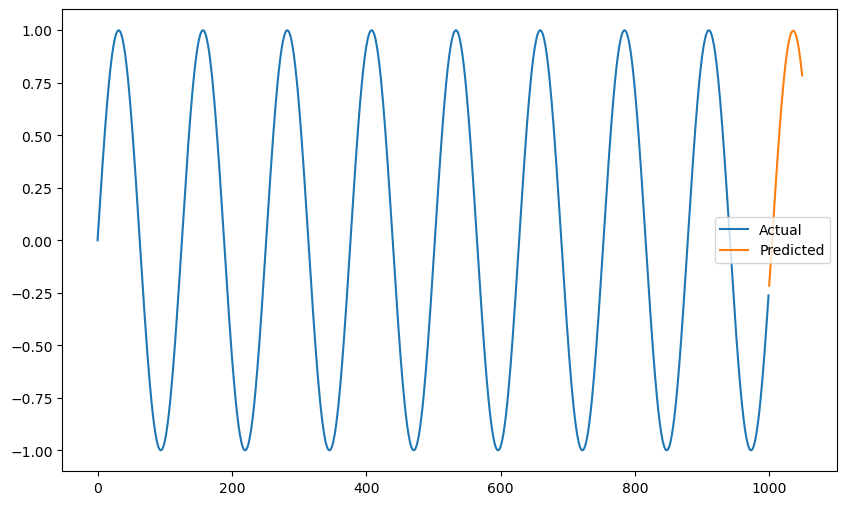

In [ ]:
# Example:

import numpy as np
import matplotlib.pyplot as plt

# Generate a sequence of numbers that follows a sine wave
numbers = [np.sin(i) for i in np.linspace(0, 50, 1000)]  # 1000 numbers between 0 and 50

# Use our function to predict the next 50 values
k = 50
predicted_values = forecast_next_values_lstm(numbers, k)

# Print the predicted values
print(predicted_values)

# Visualize the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(numbers, label='Actual')
plt.plot(range(len(numbers), len(numbers) + k), predicted_values, label='Predicted')
plt.legend()
plt.show()

# Exercise 11:

Read up on the theory behind LSTMs and discuss it with fellow participants.

# Exercise 12:

Experiment extensively with the LSTM above and come up with data sets where it yields accurate forecasts, and also those where it does not. Please keep in mind that setting hyperparameters is tricky, and even identifying those parameters in the code takes some work.

# PyTorch Forecasting Engine

The provided code implements a PyTorch neural network-based model for forecasting the next values in a given sequence of data. It consists of a NeuralNetwork class that defines the architecture of the neural network and a forecast_next_values function that utilizes the neural network to generate forecasts.

The NeuralNetwork class is a subclass of PyTorch's nn.Module. It initializes the network with a hidden linear layer, ReLU activation function, and an output linear layer. The forward method performs the forward pass through the network, applying the linear transformations and activation function to generate the output.

The forecast_next_values function takes in a sequence of data and a parameter k, which specifies the number of values to forecast. It first checks if the length of the data is sufficient for forecasting. Then, it converts the data into PyTorch tensors and defines the neural network model. The function uses mean squared error (MSE) loss as the loss function and Adam optimizer for training. It iterates through a specified number of epochs, updating the model parameters based on the loss. Finally, it generates forecasts for the next k values by iteratively predicting the next value and updating the input sequence.

Difference from TensorFlow:

PyTorch and TensorFlow are both popular deep learning frameworks, but they have some differences in terms of design principles and APIs.

Computational Graphs: TensorFlow uses a static computational graph, where the graph structure is defined upfront and data flows through it during execution. On the other hand, PyTorch uses a dynamic computational graph, allowing the graph to be defined and modified on the fly during execution. This dynamic nature of PyTorch enables easier debugging and more flexible network construction.

API and Ease of Use: TensorFlow's API is often considered more complex and low-level compared to PyTorch. TensorFlow requires users to explicitly define placeholders and sessions, and the code can be more verbose. In contrast, PyTorch offers a more intuitive and Pythonic API that is easier to understand and use. PyTorch's API resembles NumPy and provides a more immediate and interactive programming experience.

Ecosystem and Community: TensorFlow has a larger user base and a more extensive ecosystem due to its early adoption and strong support from Google. It offers a wide range of pre-trained models, tools, and libraries for various tasks. PyTorch, while growing rapidly, has a relatively smaller ecosystem but has gained popularity, especially among researchers, for its flexibility and ease of use.

Deployment and Production: TensorFlow has a stronger focus on deployment and production environments. It provides tools like TensorFlow Serving, TensorFlow Lite, and TensorFlow.js, which facilitate deploying models on different platforms and devices. PyTorch, while also capable of deployment, has a more research-oriented focus and may require additional steps or third-party libraries for deployment.

Overall, PyTorch and TensorFlow have different design philosophies and programming interfaces, catering to different preferences and use cases.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    """
    NeuralNetwork is a PyTorch module for forecasting the next values based on a given sequence of data.

    Args:
        input_size (int): The size of the input features.
        hidden_size (int): The number of units in the hidden layer.
        output_size (int): The size of the output.

    Attributes:
        hidden (torch.nn.Linear): The linear transformation for the hidden layer.
        relu (torch.nn.ReLU): The ReLU activation function.
        output (torch.nn.Linear): The linear transformation for the output layer.
    """

    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        """
        Perform forward pass through the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        """
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

def forecast_next_values(data, k):
    """
    Forecast the next 'k' values based on the given 'data' sequence.

    Args:
        data (List[int or float]): A list of numbers representing the input sequence.
        k (int): The number of values to forecast.

    Returns:
        List[float]: A list of 'k' forecasted values.

    Raises:
        ValueError: If the length of 'data' is less than 'k'.
    """

    if len(data) < k:
        raise ValueError("Insufficient data for forecasting.")

    # Convert the data into PyTorch tensors
    input_data = torch.tensor(data[:-k]).unsqueeze(1).float()
    target_data = torch.tensor(data[k:]).unsqueeze(1).float()

    # Define the model and loss function
    input_size = 1  # Assuming the input consists of single numbers
    hidden_size = 64  # Number of hidden units
    output_size = 1  # The model outputs single numbers
    model = NeuralNetwork(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()

    # Define the optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Training loop
    num_epochs = 1000  # Number of training iterations
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output = model(input_data)
        loss = criterion(output, target_data)
        loss.backward()
        optimizer.step()

    # Generate forecasts for the next k values
    with torch.no_grad():
        input_data = torch.tensor(data[-k:]).unsqueeze(1).float()
        forecasts = []
        for _ in range(k):
            output = model(input_data)
            forecast = output[-1].item()  # Extract the last scalar value from the tensor
            forecasts.append(forecast)
            input_data = torch.cat((input_data[1:], torch.tensor([[forecast]])), dim=0)

    return forecasts


In [ ]:
# Example

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k = 3
forecasts = forecast_next_values(data, k)
print(forecasts)  # Output: [11.0, 12.0, 13.0]


[13.29096508026123, 17.2159423828125, 21.897075653076172]
